In [8]:
import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt

train_data_dir = "train"
validation_data_dir = "val"
img_width, img_height = 224, 224
model_name = 'vgg19_1.h5'

model = keras.models.load_model(model_name)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 24)      1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 32)        19232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

Found 9044 images belonging to 2 classes.


array([ 0.0011528 ,  0.00046968,  0.00053037,  0.02310941,  0.02551084,
        0.12440862,  0.03679927,  0.00249214], dtype=float32)

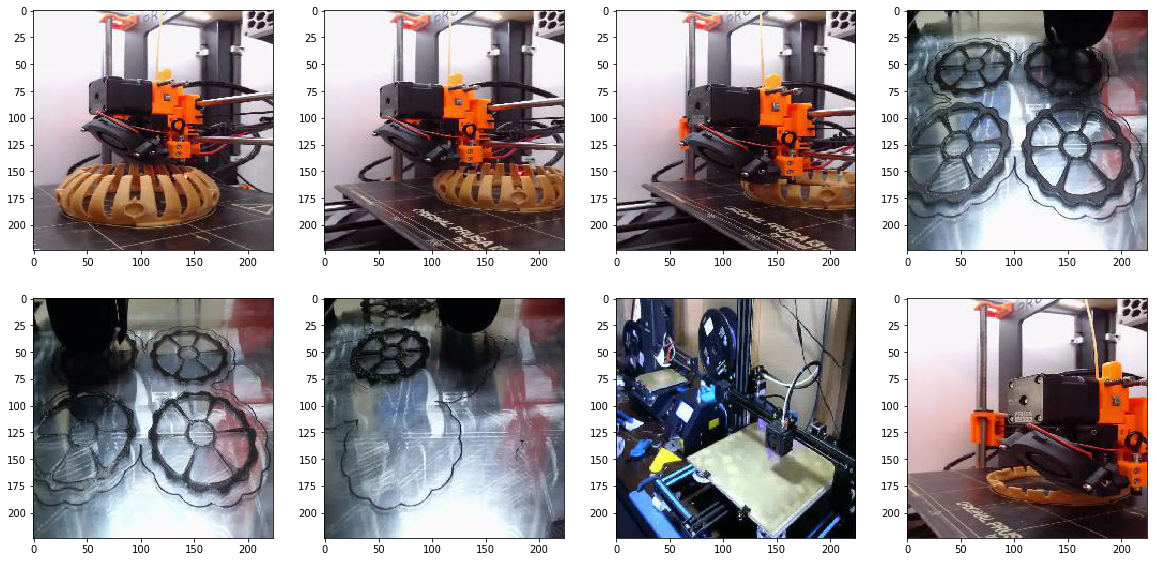

In [58]:
test_datagen = ImageDataGenerator(
rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = 8,
class_mode = "categorical")

imgs = validation_generator.next()[0]

plt.figure(figsize=(20,15))
columns = 4
for i in range(len(imgs)):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(imgs[i])
    
model.predict(imgs)[:,1]

In [9]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )/255.0
    return data

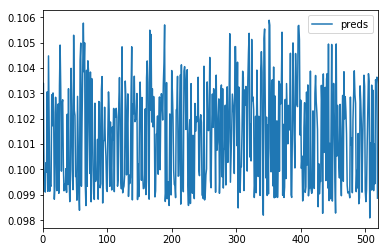

In [10]:
import matplotlib.image as mpimg
import glob

prefix = '526316004'
folder = 'val/best/'

plt.figure(figsize=(20,20))
columns = 16

jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds[:,1]))
df.plot()
# for i, img_path in enumerate(jpgs):
#     plt.subplot(len(jpgs) / columns + 1, columns, i + 1)
#     plt.imshow(mpimg.imread(img_path))

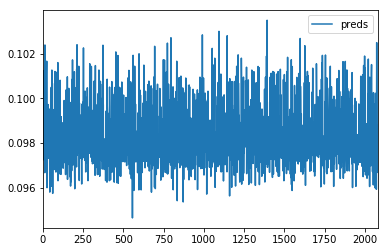

In [11]:
folder = 'val/worst/'
jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds[:,1]))
df.plot()